In [1]:
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
sys.path

['/home/cms-jovyan/SIDM/sidm/studies',
 '/home/cms-jovyan/SIDM/sidm/studies/../..',
 '/opt/conda/lib/python39.zip',
 '/opt/conda/lib/python3.9',
 '/opt/conda/lib/python3.9/lib-dynload',
 '',
 '/opt/conda/lib/python3.9/site-packages']

In [2]:
# python
import sys
import statistics
import os
import importlib
# columnar analysis
import awkward as ak
from dask.distributed import Client
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from coffea import processor
import hist
import matplotlib.patches as patches
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities, cutflow, scaleout
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
#utilities.set_plot_style()
%matplotlib inline

In [3]:
samples = []
bg_samples = [
    "TTJets",
]

#######################################################
SIDM_4mu_100GeV_0p25GeV_samples = [
    "4mu_100GeV_0p25GeV_0p02mm",
    "4mu_100GeV_0p25GeV_0p2mm",
    "4mu_100GeV_0p25GeV_2p0mm",
    "4mu_100GeV_0p25GeV_10p0mm",
    "4mu_100GeV_0p25GeV_20p0mm",
]
SIDM_4mu_100GeV_1p2GeV_samples = [
    "4mu_100GeV_1p2GeV_0p096mm",
    "4mu_100GeV_1p2GeV_0p96mm",
    "4mu_100GeV_1p2GeV_9p6mm",
    "4mu_100GeV_1p2GeV_48p0mm",
    "4mu_100GeV_1p2GeV_96p0mm",
]
SIDM_4mu_100GeV_5p0GeV_samples = [
    "4mu_100GeV_5p0GeV_0p4mm",
    "4mu_100GeV_5p0GeV_4p0mm",
    "4mu_100GeV_5p0GeV_40p0mm", 
    "4mu_100GeV_5p0GeV_200p0mm",
    "4mu_100GeV_5p0GeV_400p0mm",
]
#######################################################
SIDM_4mu_150GeV_0p25GeV_samples = [
    "4mu_150GeV_0p25GeV_0p013mm",
    "4mu_150GeV_0p25GeV_0p13mm",
    "4mu_150GeV_0p25GeV_1p3mm",
    "4mu_150GeV_0p25GeV_6p7mm",
    "4mu_150GeV_0p25GeV_13p0mm",
]
SIDM_4mu_150GeV_1p2GeV_samples = [
    "4mu_150GeV_1p2GeV_0p064mm",
    "4mu_150GeV_1p2GeV_0p64mm",
    "4mu_150GeV_1p2GeV_6p4mm",
    "4mu_150GeV_1p2GeV_32p0mm",
    "4mu_150GeV_1p2GeV_64p0mm",
]
SIDM_4mu_150GeV_5p0GeV_samples = [
    "4mu_150GeV_5p0GeV_0p27mm",
    "4mu_150GeV_5p0GeV_2p7mm",
    "4mu_150GeV_5p0GeV_27p0mm",
    "4mu_150GeV_5p0GeV_130p0mm",
    "4mu_150GeV_5p0GeV_270p0mm",
]
#######################################################
SIDM_4mu_200GeV_0p25GeV_samples = [
    "4mu_200GeV_0p25GeV_0p01mm",
    "4mu_200GeV_0p25GeV_0p1mm",
    "4mu_200GeV_0p25GeV_1p0mm",
    "4mu_200GeV_0p25GeV_5p0mm",
    "4mu_200GeV_0p25GeV_10p0mm",
]
SIDM_4mu_200GeV_1p2GeV_samples = [
    "4mu_200GeV_1p2GeV_0p048mm",
    "4mu_200GeV_1p2GeV_0p48mm",
    "4mu_200GeV_1p2GeV_4p8mm",
    "4mu_200GeV_1p2GeV_24p0mm",
    "4mu_200GeV_1p2GeV_48p0mm",
]
SIDM_4mu_200GeV_5p0GeV_samples = [
    "4mu_200GeV_5p0GeV_0p2mm",
    "4mu_200GeV_5p0GeV_2p0mm",
    "4mu_200GeV_5p0GeV_20p0mm",
    "4mu_200GeV_5p0GeV_100p0mm",
    "4mu_200GeV_5p0GeV_200p0mm",
]
#######################################################
SIDM_4mu_500GeV_0p25GeV_samples = [
    "4mu_500GeV_0p25GeV_0p004mm",
    "4mu_500GeV_0p25GeV_0p04mm",
    "4mu_500GeV_0p25GeV_0p4mm",
    "4mu_500GeV_0p25GeV_2p0mm",
    "4mu_500GeV_0p25GeV_4p0mm",
]
SIDM_4mu_500GeV_1p2GeV_samples = [
    "4mu_500GeV_1p2GeV_0p019mm",
    "4mu_500GeV_1p2GeV_0p19mm",
    "4mu_500GeV_1p2GeV_1p9mm",
    "4mu_500GeV_1p2GeV_9p6mm",
    "4mu_500GeV_1p2GeV_19p0mm",
]
SIDM_4mu_500GeV_5p0GeV_samples = [
    "4mu_500GeV_5p0GeV_0p08mm",
    "4mu_500GeV_5p0GeV_0p8mm",
    "4mu_500GeV_5p0GeV_8p0mm",
    "4mu_500GeV_5p0GeV_40p0mm",
    "4mu_500GeV_5p0GeV_80p0mm",
    
    #"4mu_500GeV_5p0GeV_800p0mm",
    #"4mu_500GeV_5p0GeV_8000p0mm", these are also here as long Lxy tests
]
#######################################################
SIDM_4mu_800GeV_0p25GeV_samples = [
    "4mu_800GeV_0p25GeV_0p0025mm",
    "4mu_800GeV_0p25GeV_0p025mm",
    "4mu_800GeV_0p25GeV_0p25mm",
    "4mu_800GeV_0p25GeV_1p2mm",
    "4mu_800GeV_0p25GeV_2p5mm",
]
SIDM_4mu_800GeV_1p2GeV_samples = [
    "4mu_800GeV_1p2GeV_0p012mm",
    "4mu_800GeV_1p2GeV_0p12mm",
    "4mu_800GeV_1p2GeV_1p2mm",
    "4mu_800GeV_1p2GeV_6p0mm",
    "4mu_800GeV_1p2GeV_12p0mm",
]
SIDM_4mu_800GeV_5p0GeV_samples = [
    "4mu_800GeV_5p0GeV_0p05mm",
    "4mu_800GeV_5p0GeV_0p5mm",
    "4mu_800GeV_5p0GeV_5p0mm",
    "4mu_800GeV_5p0GeV_25p0mm",
    "4mu_800GeV_5p0GeV_50p0mm",
]
#######################################################
SIDM_4mu_1000GeV_0p25GeV_samples = [ # getting keyErrors on all of these; I think they might be empty
    "4mu_1000GeV_0p25GeV_0p002mm", # Running gives "cannot unpack non-iterable NoneType object"
    "4mu_1000GeV_0p25GeV_0p02mm",
    "4mu_1000GeV_0p25GeV_0p2mm",
    "4mu_1000GeV_0p25GeV_1p0mm",
    "4mu_1000GeV_0p25GeV_2p0mm",
]
SIDM_4mu_1000GeV_1p2GeV_samples = [ # these also give keyErrors
    "4mu_1000GeV_1p2GeV_0p0096mm",
    "4mu_1000GeV_1p2GeV_0p096mm",
    "4mu_1000GeV_1p2GeV_0p96mm",
    "4mu_1000GeV_1p2GeV_4p8mm",
    "4mu_1000GeV_1p2GeV_9p6mm",
]
SIDM_4mu_1000GeV_5p0GeV_samples = [
    "4mu_1000GeV_5p0GeV_0p04mm",
    "4mu_1000GeV_5p0GeV_0p4mm",
    "4mu_1000GeV_5p0GeV_4p0mm",
    "4mu_1000GeV_5p0GeV_20p0mm",
    "4mu_1000GeV_5p0GeV_40p0mm",
]
#######################################################


SIDM_4mu_100GeV_samples = []
SIDM_4mu_100GeV_samples = SIDM_4mu_100GeV_samples + SIDM_4mu_100GeV_0p25GeV_samples + SIDM_4mu_100GeV_1p2GeV_samples + SIDM_4mu_100GeV_5p0GeV_samples

SIDM_4mu_150GeV_samples = []
SIDM_4mu_150GeV_samples = SIDM_4mu_150GeV_samples + SIDM_4mu_150GeV_0p25GeV_samples + SIDM_4mu_150GeV_1p2GeV_samples + SIDM_4mu_150GeV_5p0GeV_samples

SIDM_4mu_200GeV_samples = []
SIDM_4mu_200GeV_samples = SIDM_4mu_200GeV_samples + SIDM_4mu_200GeV_0p25GeV_samples + SIDM_4mu_200GeV_1p2GeV_samples + SIDM_4mu_200GeV_5p0GeV_samples

SIDM_4mu_500GeV_samples = []
SIDM_4mu_500GeV_samples = SIDM_4mu_500GeV_samples + SIDM_4mu_500GeV_0p25GeV_samples + SIDM_4mu_500GeV_1p2GeV_samples + SIDM_4mu_500GeV_5p0GeV_samples

SIDM_4mu_800GeV_samples = []
SIDM_4mu_800GeV_samples = SIDM_4mu_800GeV_samples + SIDM_4mu_800GeV_0p25GeV_samples + SIDM_4mu_800GeV_1p2GeV_samples + SIDM_4mu_800GeV_5p0GeV_samples

SIDM_4mu_1000GeV_samples = []
SIDM_4mu_1000GeV_samples = SIDM_4mu_1000GeV_samples + SIDM_4mu_1000GeV_0p25GeV_samples + SIDM_4mu_1000GeV_1p2GeV_samples + SIDM_4mu_1000GeV_5p0GeV_samples

samples_sublists = [
    SIDM_4mu_100GeV_0p25GeV_samples, SIDM_4mu_100GeV_1p2GeV_samples, SIDM_4mu_100GeV_5p0GeV_samples, 
    SIDM_4mu_150GeV_0p25GeV_samples, SIDM_4mu_150GeV_1p2GeV_samples, SIDM_4mu_150GeV_5p0GeV_samples,
    SIDM_4mu_200GeV_0p25GeV_samples, SIDM_4mu_200GeV_1p2GeV_samples, SIDM_4mu_200GeV_5p0GeV_samples, 
    SIDM_4mu_500GeV_0p25GeV_samples, SIDM_4mu_500GeV_1p2GeV_samples, SIDM_4mu_500GeV_5p0GeV_samples,
    SIDM_4mu_800GeV_0p25GeV_samples, SIDM_4mu_800GeV_1p2GeV_samples, SIDM_4mu_800GeV_5p0GeV_samples,
    #SIDM_4mu_1000GeV_0p25GeV_samples, 
    SIDM_4mu_1000GeV_1p2GeV_samples, # These two groups don't work at all
    SIDM_4mu_1000GeV_5p0GeV_samples,
    ]

In [4]:
samples = []
samples = samples + bg_samples
for sublist in samples_sublists:
    print(sublist[0])
    samples = samples + [sublist[0]]
print(samples)

4mu_100GeV_0p25GeV_0p02mm
4mu_100GeV_1p2GeV_0p096mm
4mu_100GeV_5p0GeV_0p4mm
4mu_150GeV_0p25GeV_0p013mm
4mu_150GeV_1p2GeV_0p064mm
4mu_150GeV_5p0GeV_0p27mm
4mu_200GeV_0p25GeV_0p01mm
4mu_200GeV_1p2GeV_0p048mm
4mu_200GeV_5p0GeV_0p2mm
4mu_500GeV_0p25GeV_0p004mm
4mu_500GeV_1p2GeV_0p019mm
4mu_500GeV_5p0GeV_0p08mm
4mu_800GeV_0p25GeV_0p0025mm
4mu_800GeV_1p2GeV_0p012mm
4mu_800GeV_5p0GeV_0p05mm
4mu_1000GeV_1p2GeV_0p0096mm
4mu_1000GeV_5p0GeV_0p04mm
['TTJets', '4mu_100GeV_0p25GeV_0p02mm', '4mu_100GeV_1p2GeV_0p096mm', '4mu_100GeV_5p0GeV_0p4mm', '4mu_150GeV_0p25GeV_0p013mm', '4mu_150GeV_1p2GeV_0p064mm', '4mu_150GeV_5p0GeV_0p27mm', '4mu_200GeV_0p25GeV_0p01mm', '4mu_200GeV_1p2GeV_0p048mm', '4mu_200GeV_5p0GeV_0p2mm', '4mu_500GeV_0p25GeV_0p004mm', '4mu_500GeV_1p2GeV_0p019mm', '4mu_500GeV_5p0GeV_0p08mm', '4mu_800GeV_0p25GeV_0p0025mm', '4mu_800GeV_1p2GeV_0p012mm', '4mu_800GeV_5p0GeV_0p05mm', '4mu_1000GeV_1p2GeV_0p0096mm', '4mu_1000GeV_5p0GeV_0p04mm']


In [5]:
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=2)

In [6]:
runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    #executor=processor.DaskExecutor(),
    #executor=processor.FuturesExecutor(),
    schema=NanoAODSchema,
    # maxchunks=1,
)

hist_menu = utilities.load_yaml("../configs/hist_collections.yaml")
hist_choice = "base"
collection = utilities.flatten(hist_menu[hist_choice]) #To change the histograms used, swap "base" for the other collections
p = sidm_processor.SidmProcessor(
    [
        "base",
        "baseNoLj",
        "4mu", # basic cuts + 4mu requirement
        "matchedLj", # strict cuts on lj objects
        "4mu_matchedLj",
    ],
    [hist_choice],
    lj_reco_choices=["0.4"],
    llpnanoaod=True,
)
output = runner.run(fileset, treename='Events', processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in
divide
  result = getattr(ufunc, method)(

#--------------------------------------------------------------------------
#                         FastJet release 3.4.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the GNU GPL v2 or higher.  
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code,
# CGAL and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------


Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

Not applying any cuts to the lepton jets for channel baseNoLj

/opt/conda/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered 
in divide
  result = getattr(ufunc, method)(

Not applying any cuts to the lepton jets for channel baseNoLj

In [7]:
cutflow.print_multi_table([out[samples[0]]["cutflow"]["4mu"]], [samples[0]], fraction=False, unweighted=False)


cut name        Total cuts:
                      TTJets
------------  --------------
No selection        77933.00
PV filter           77790.00
>=2 LJs              1062.00
4mu                     2.00



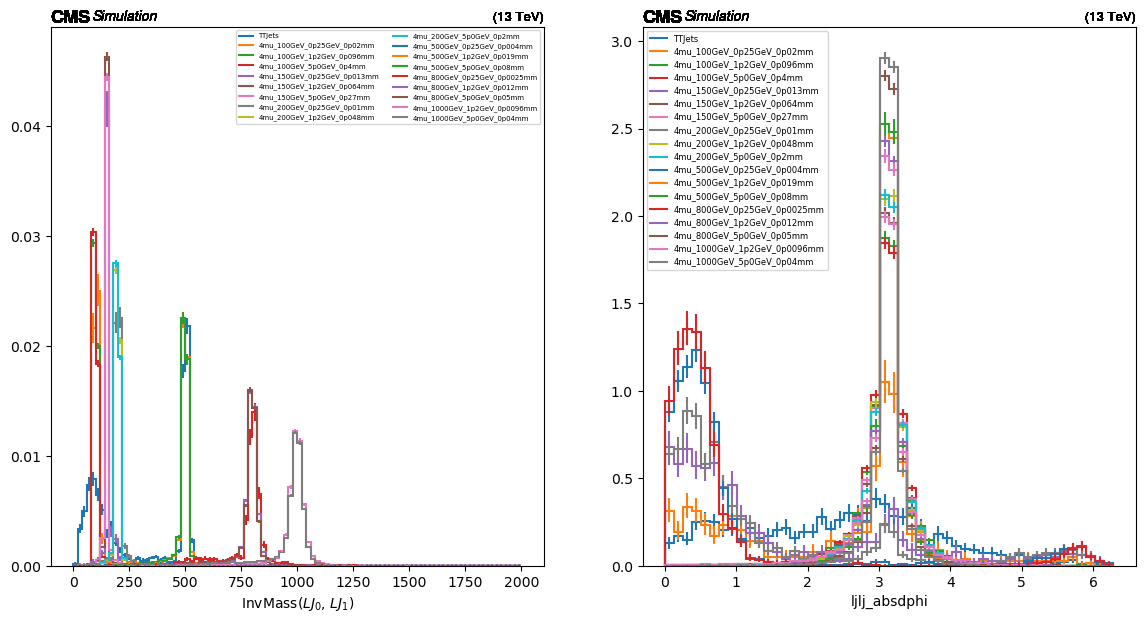

In [8]:
plt.subplots(1,2,figsize=(14,7))
plt.subplot(1,2,1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_invmass"]["base", :], flow='none', density=True)
plt.legend(samples, loc=1, prop={'size': 5}, ncol=2)
plt.subplot(1,2,2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["base", :], flow='none', density=True)
plt.legend(samples, loc=2, prop={'size': 6})

Plots several different histograms for all samples. It is clear from these that the 4mu samples (of course) don't have electrons or photons, and are almost all composed of four muons. Under the matchedLj channel, the lepton jet object cuts are more strict than those of the 4mu or llpnano channels, so the number of cut events is higher on the >=2 lj cut (since there are fewer objects qualifying as lepton jets). The background cannot be analyzed in this channel, since one of the cuts requires >= 2 matched dark photons ("As"), which are gen-level particles. Since the background does not generate dark photons, none of the events have these As, so they are all cut.

In the low-mass (100GeV) samples of dark matter bound states, the number of dsa muons is relatively low, with most samples having only zero or one.

In high-mass cases (1000GeV), the more displaced samples are much less clustered around 4 muons, with a significant number of events having only three or less. These same samples were also more likely to have one or more dsa muons. I'm not sure if these are counted separately by the muon_n histogram.

In [9]:
def count(hist, bounds, verbose = False):
    result = 0
    dim = len(hist.axes) if isinstance(hist, list) else len(hist.axes)
    if dim == 1:
        x = hist.to_numpy()
        bins = []
        for i in range(len(x[0])):
            temp = [x[0][i], (x[1][i]+x[1][i+1])/2]
            bins.append(temp)
        for i in range(len(bins)):
            if bins[i][1] >= min(bounds[0]) and bins[i][1] <= max(bounds[0]):
                result += bins[i][0]
    if dim == 2:
        x = hist.to_numpy()
        bins = []
        binvals = []
        for i in range(len(x[2]) - 1): # each i corresponds to a row of bins
            for j in range(len(x[1]) - 1): # each j corresponds to the column
                bins.append([x[0][j][i], (x[1][j] + x[1][j+1])/2, (x[2][i] + x[2][i+1])/2])
        for i in range(len(bins)):
            if bins[i][1] >= bounds[0][0] and bins[i][1] <= bounds[1][0] and bins[i][2] >= bounds[0][1] and bins[i][2] <= bounds[1][1]:
                if verbose: print(bins[i])
                result += bins[i][0]
    return result

def drawRect(fig, ax, x0, x1, color='r'):
    ax.add_patch(patches.Rectangle((x0[0], x0[1]), abs(x0[0]-x1[0]), abs(x0[1]-x1[1]), linewidth=1, edgecolor=color, facecolor='none'))
    fig.show()
    
def countPlot(hist, fig, ax, bounds, color='r'):
    dim = len(hist.axes) if isinstance(hist, list) else len(hist.axes)
    if dim == 1:
        fig.axvline(x = bounds[0])
        fig.axvline(x = bounds[1])
    if dim == 2:
        drawRect(fig, ax, bounds[0], bounds[1], color)
    fig.show()
    return count(hist, bounds)
    
def ABCD(hist, fig, ax, x0, x1):
    lowX = x0[0]
    lowY = x0[1]
    midX = (x0[0] + x1[0]) / 2
    midY = (x0[1] + x1[1]) / 2
    highX = x1[0]
    highY = x1[1]
    
    xrange = midX-lowX
    yrange = midY-lowY
    
    drawRect(fig, ax, x0, (midX, midY), 'yellow') # C
    drawRect(fig, ax, (midX, lowY), (highX, midY), 'green') # D
    drawRect(fig, ax, (lowX, midY), (midX, highY), 'red') # A
    drawRect(fig, ax, (midX, midY), (highX, highY), 'orange') # B
    
    ax.text(lowX + 0.2*xrange, midY - 0.1*yrange, "C", fontsize=11, color='yellow')
    ax.text(midX + 0.2*xrange, midY - 0.1*yrange, "D", fontsize=11, color='green')
    ax.text(lowX + 0.2*xrange, highY - 0.1*yrange, "A", fontsize=11, color='red')
    ax.text(midX + 0.2*xrange, highY - 0.1*yrange, "B", fontsize=11, color='orange')
    
    countA = count(a, [(lowX, midY), (midX, highY)])
    countB = count(a, [(midX, midY), x1])
    countC = count(a, [x0, (midX, midY)])
    countD = count(a, [(midX, lowY), (highX, midY)])
    
    return [countA, countB, countC, countD]

Events: 286.0


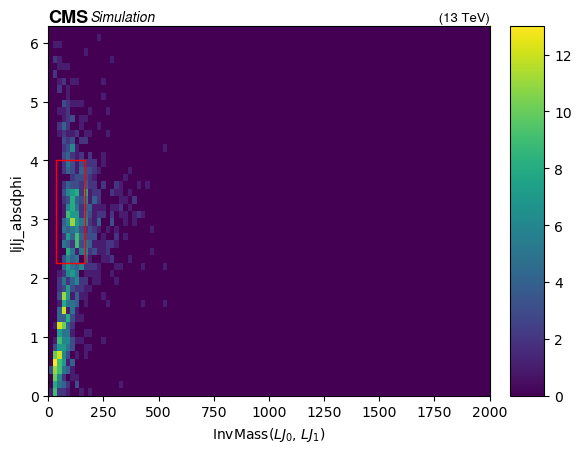

In [10]:
fig, ax = plt.subplots()
a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :]
x = a.to_numpy()
utilities.plot(a)
x0 = (35, 0.5)
x1 = (300, 4)
x2 = ((x0[0]+x1[0])/2, (x0[1]+x1[1])/2)
#drawRect(fig, ax, x0, x1)
#drawRect(fig, ax, (x0[0], x2[1]), (x2[0], x1[1]))
print(f"Events: {countPlot(a, fig, ax, [(x0[0], x2[1]), (x2[0], x1[1])])}")
#print(f"Events within the rectangle: {count(a, [(x0[0], x2[1]), (x2[0], x1[1])])}")

Counts in each region [A, B, C, D]: [2090.0, 1.0, 3981.0, 2.0]
Ratios:
	A:B = 2090.0
	C:D = 1990.5


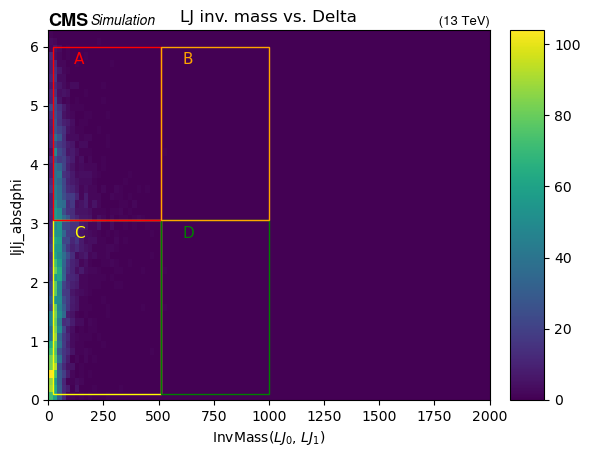

In [11]:
fig, ax1 = plt.subplots()
a = out[samples[0]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["baseNoLj", :, :]
utilities.plot(a)
x0 = (20, 0.1)
x1 = (1000, 6)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
#print(x2)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

fig.show()
# Displays ABCD in order red, orange, yellow, green
print(f"Counts in each region [A, B, C, D]: {counts}")
if counts[1]==0:
    counts[1]=0.001
if counts[3]==0:
    counts[3]=0.001
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios:\n\tA:B = {A_to_B}\n\tC:D = {C_to_D}")
ax1.title.set_text("LJ inv. mass vs. Delta")

(635.0, 2.05)
[1269.0, 20065.0, 6.0, 87.0]
Ratios: A:B = 0.06324445551956143, C:D = 0.06896551724137931


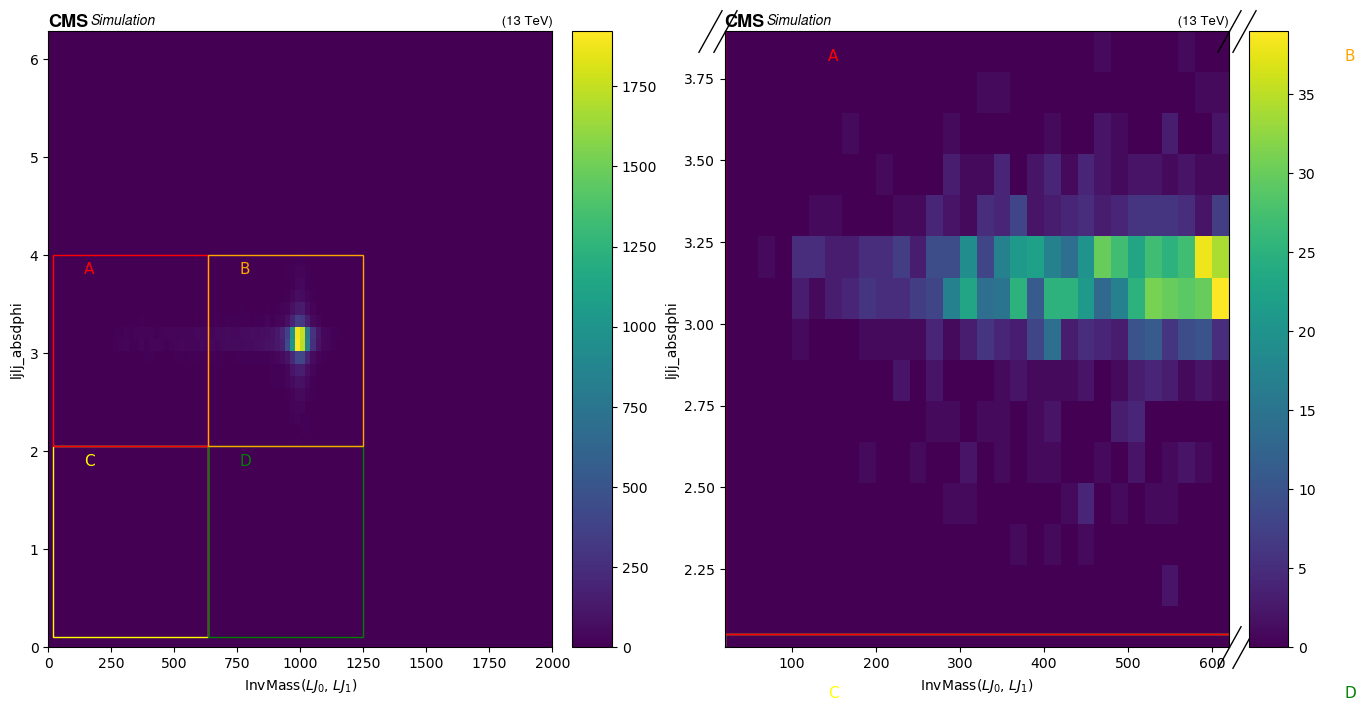

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
plt.subplot(1,2,1)
a = out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :]
utilities.plot(a)
x0 = (20, 0.1)
x1 = (1250, 4)
x2 = ((x0[0]+x1[0])/2,(x0[1]+x1[1])/2)
print(x2)
counts = ABCD(a, fig, ax1, x0, x1) # pass ABCD() a rectangle, and it is divided into 4 equal parts

fig.show()
# Displays in order red, orange, yellow, green
print(counts)
A_to_B = counts[0]/counts[1]
C_to_D = counts[2]/counts[3]
print(f"Ratios: A:B = {A_to_B}, C:D = {C_to_D}")

plt.subplot(1,2,2)
b = out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", 20j:635j, 2.05j:4j]
utilities.plot(b)
counts = ABCD(b, fig, ax2, x0, x1)

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7efe107723d0>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efe10714f10>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7efe1065f490>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

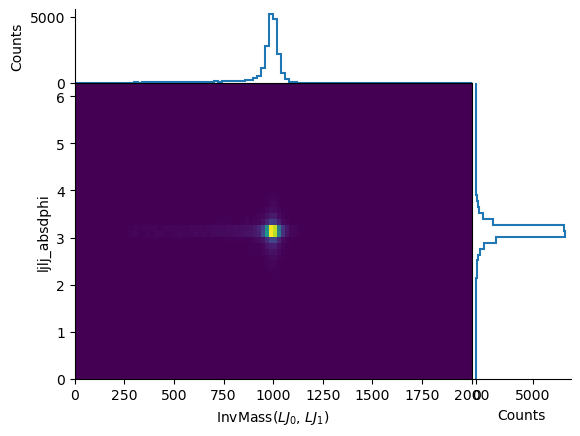

In [13]:
out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :].plot2d_full()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7efe1055bc70>, cbar=<matplotlib.colorbar.Colorbar object at 0x7efe104d6ca0>, text=[])

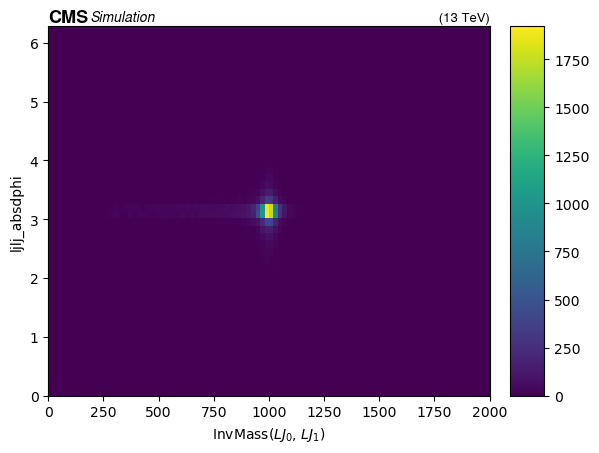

In [14]:
utilities.plot(out[samples[-1]]["hists"]["abcd_lj_lj_invmass_vs_absdphi"]["base", :, :])

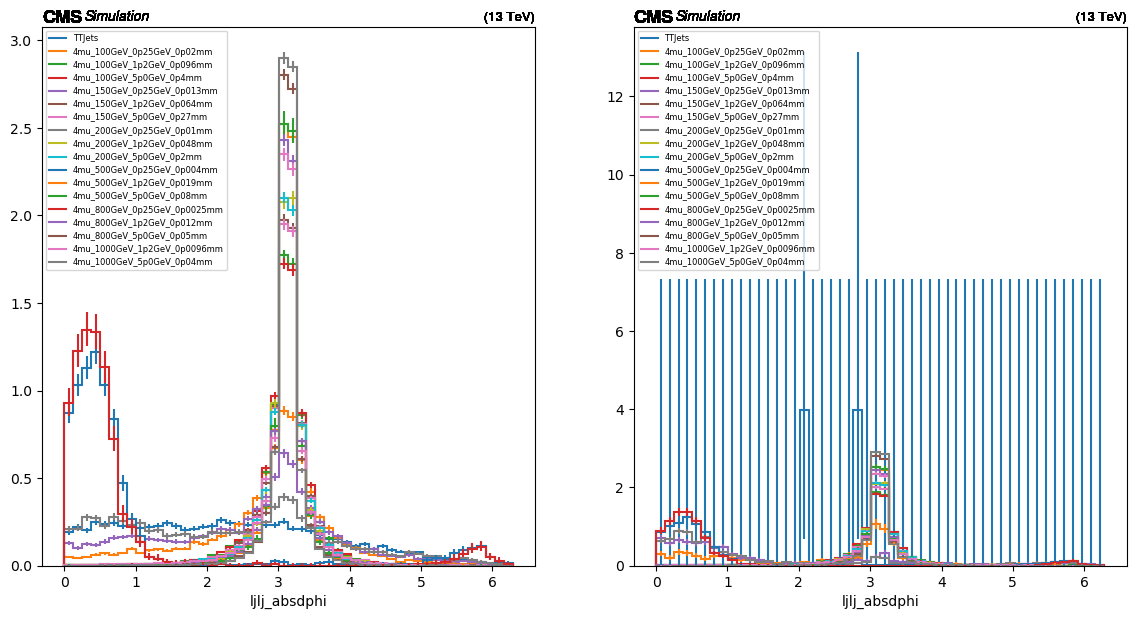

In [15]:
plt.subplots(1,2,figsize=(14,7))
plt.subplot(1,2,1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["baseNoLj", :], flow='none', density=True)
plt.legend(samples, loc=2, prop={'size': 6})
plt.subplot(1,2,2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["lj_lj_absdphi"]["4mu", :], flow='none', density=True)
plt.legend(samples, loc=2, prop={'size': 6})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

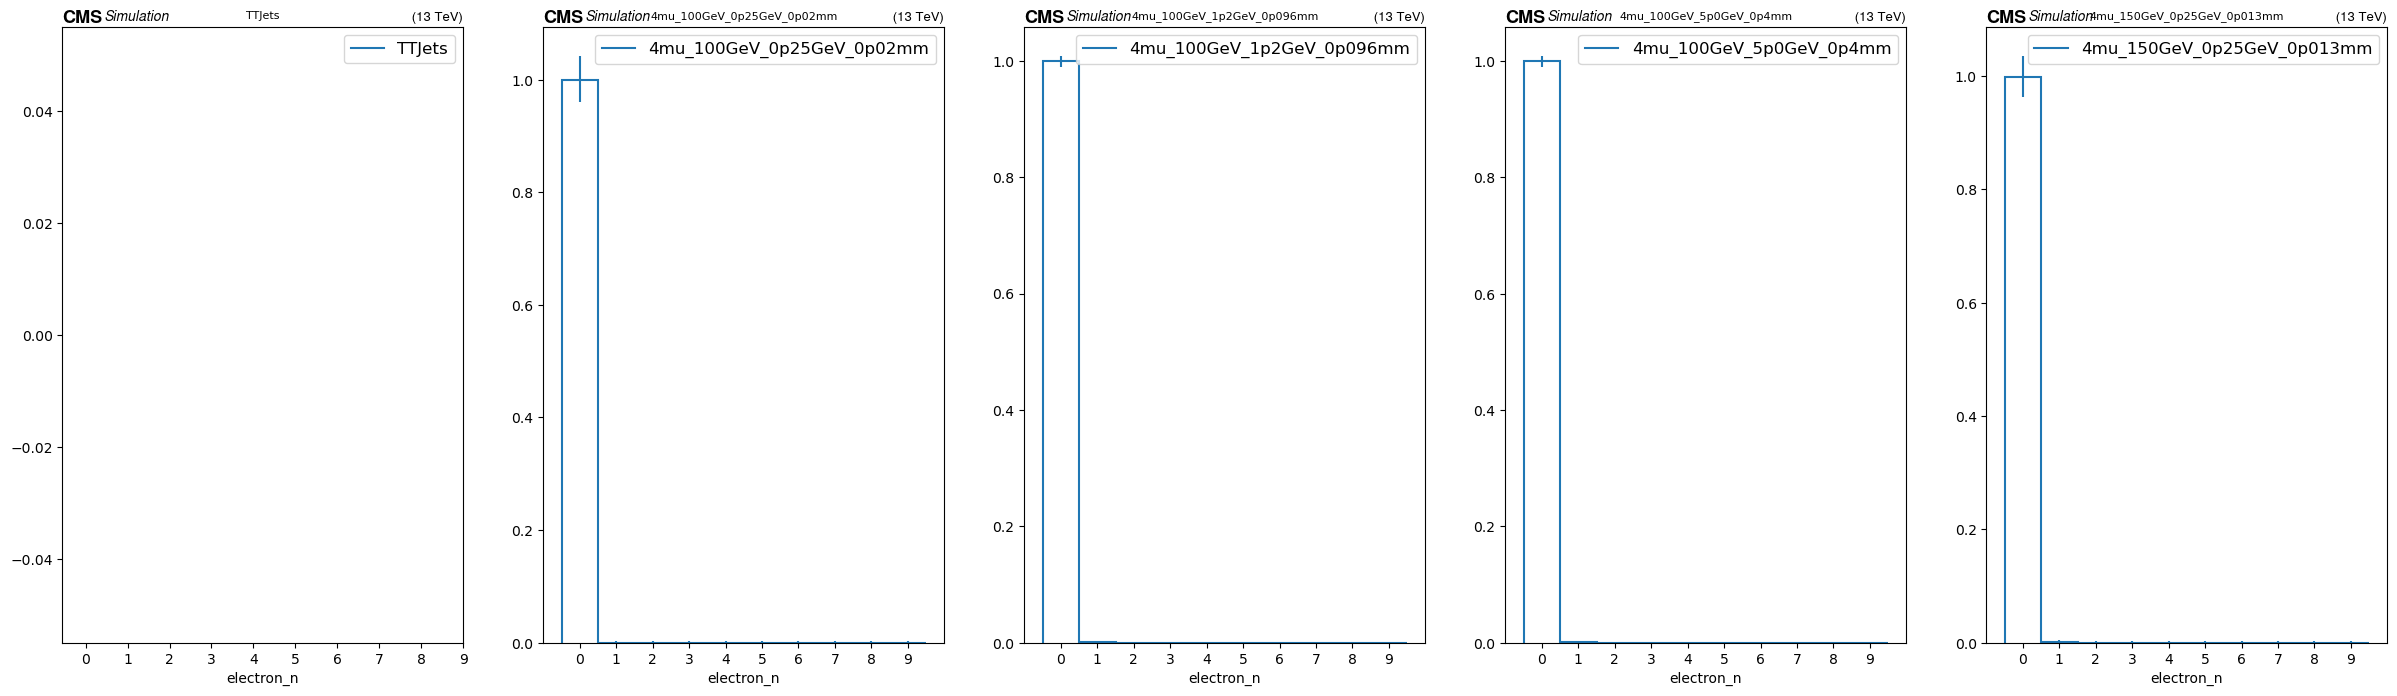

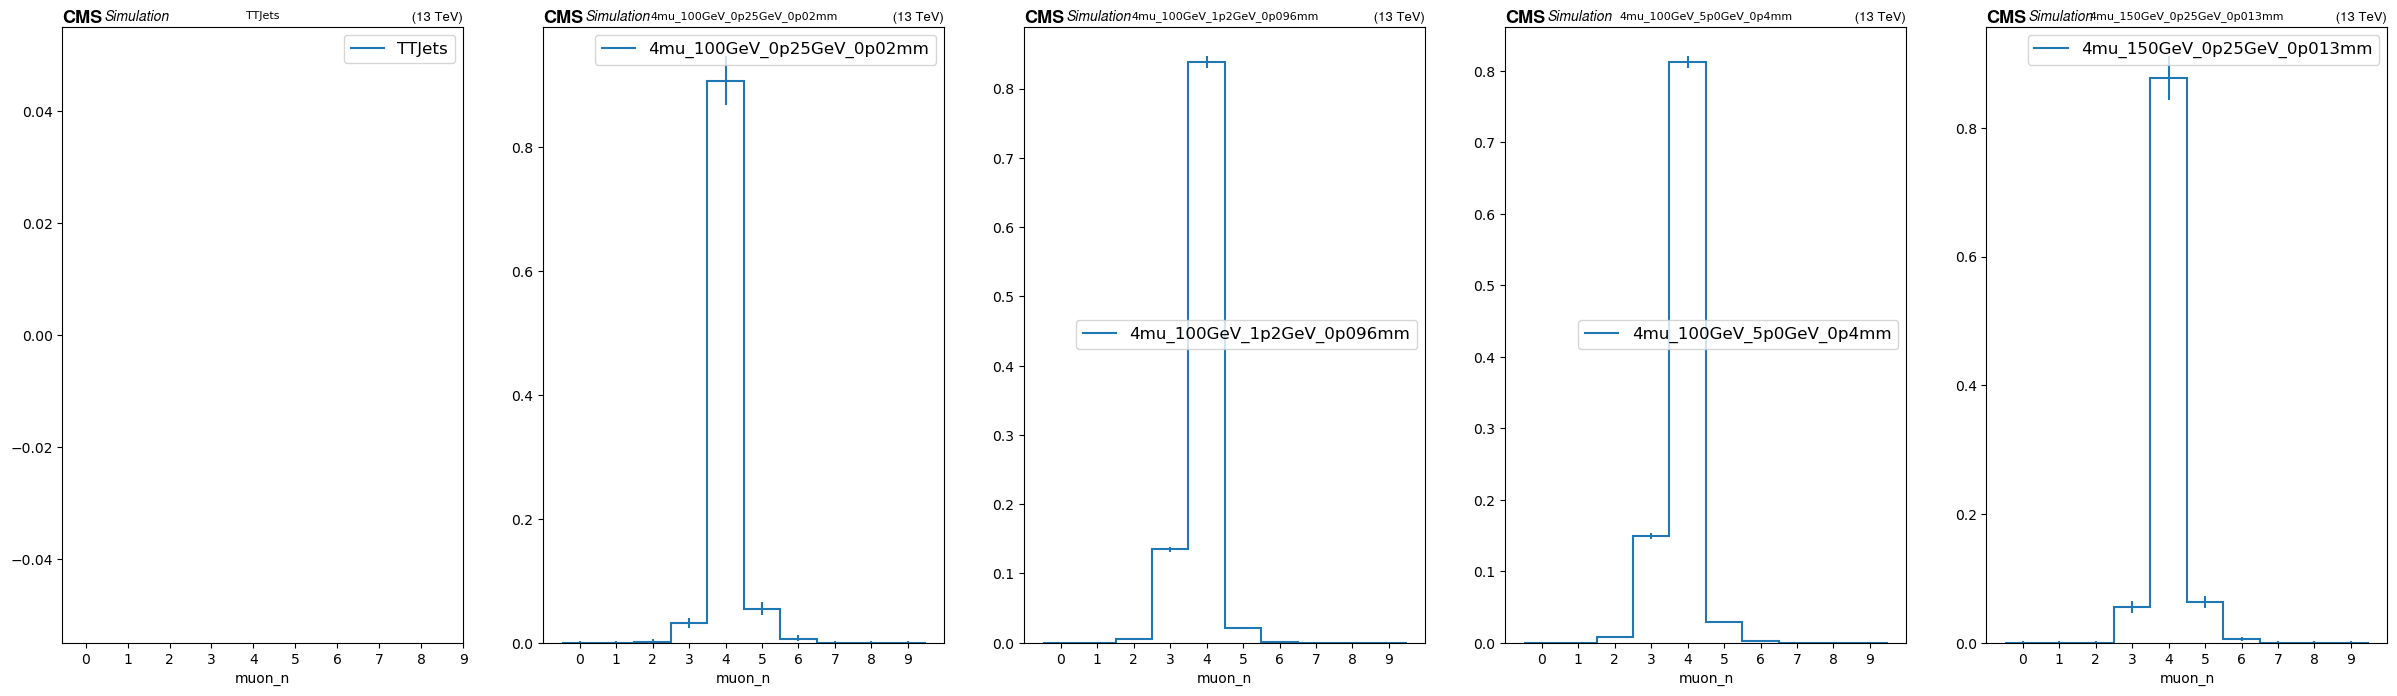

In [16]:
histlist = ["electron_n", "muon_n"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

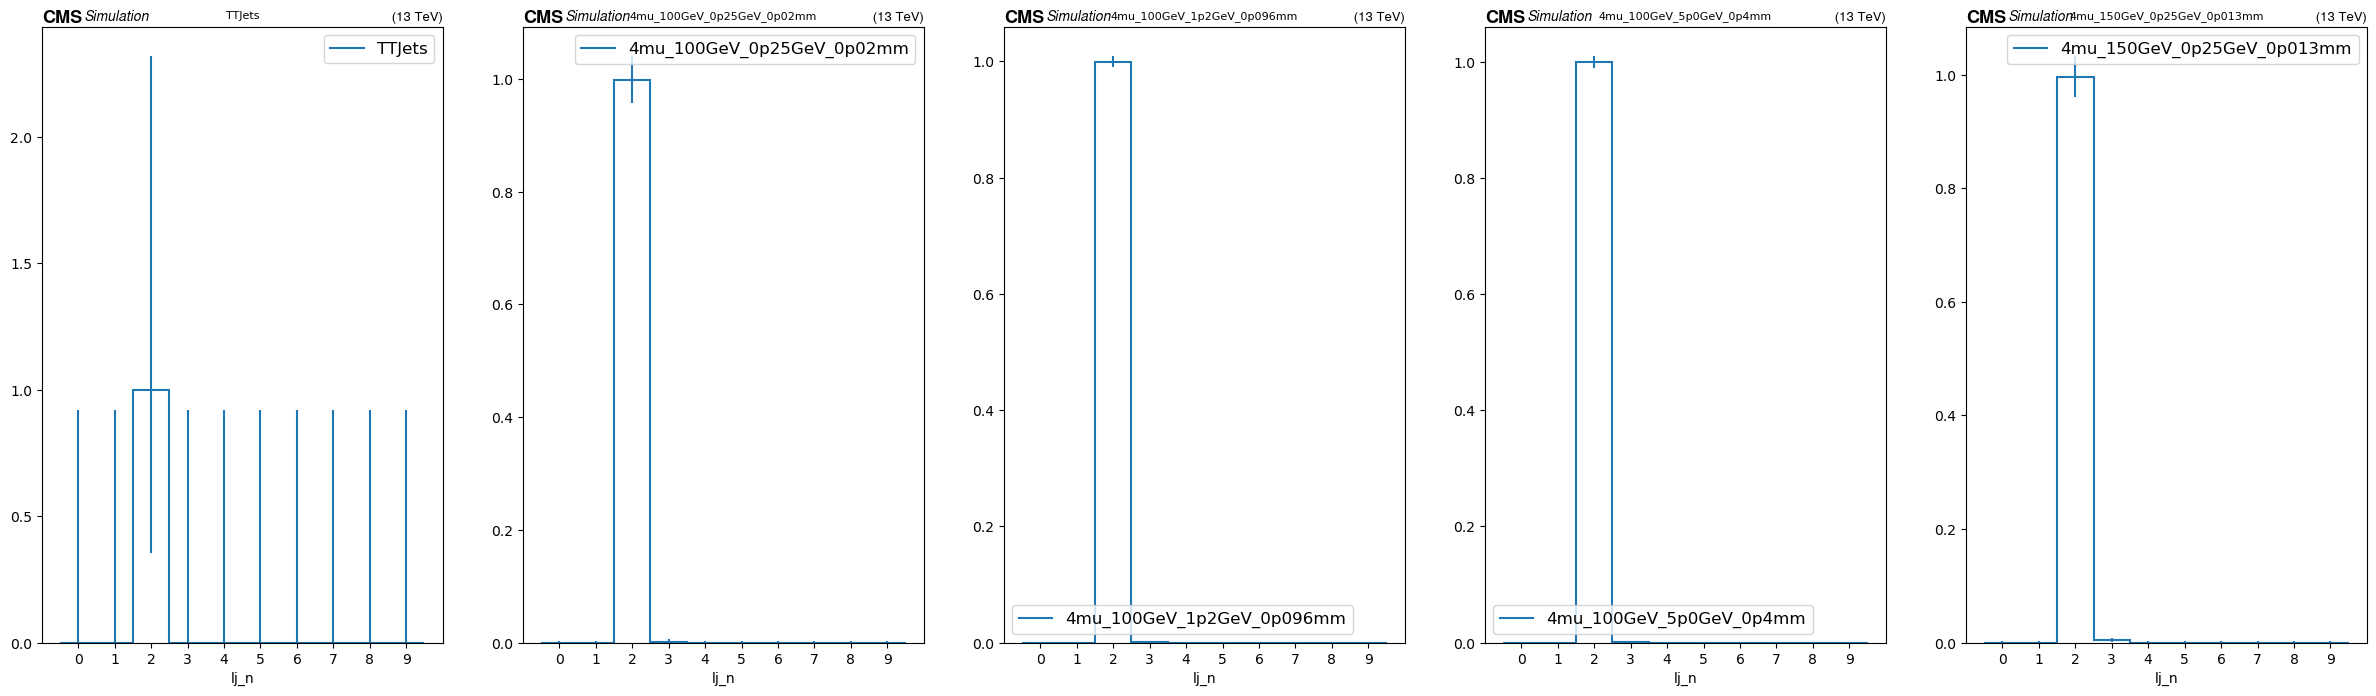

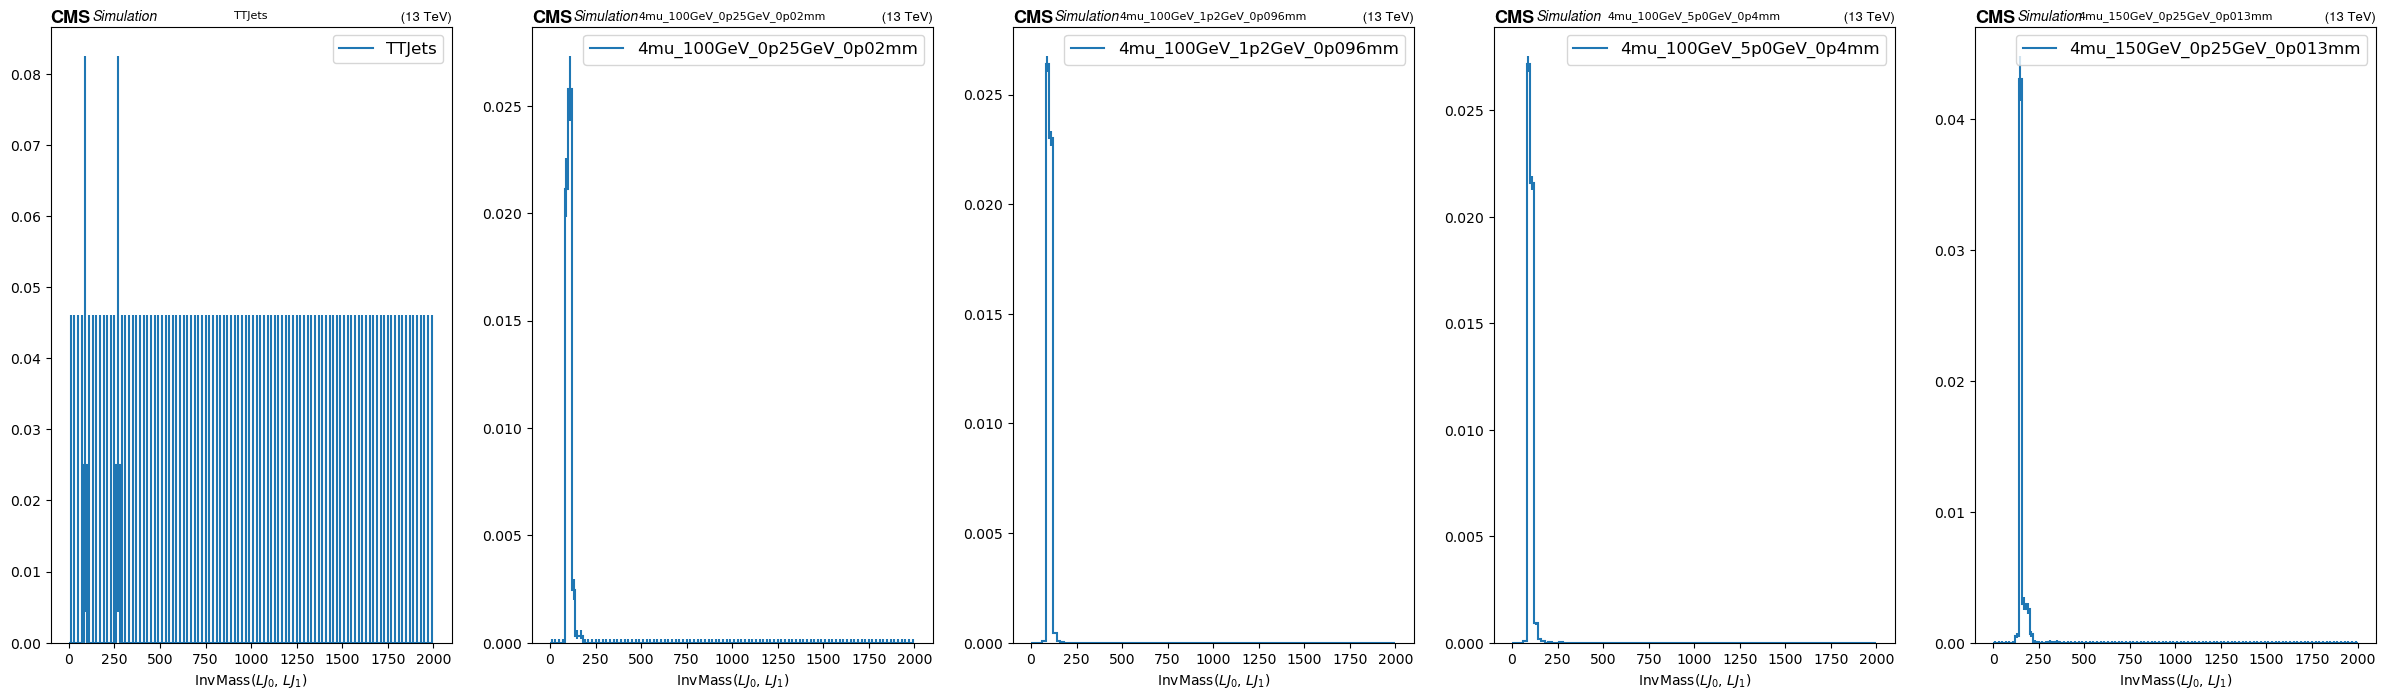

In [17]:
histlist = ["lj_n", "lj_lj_invmass"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["4mu", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

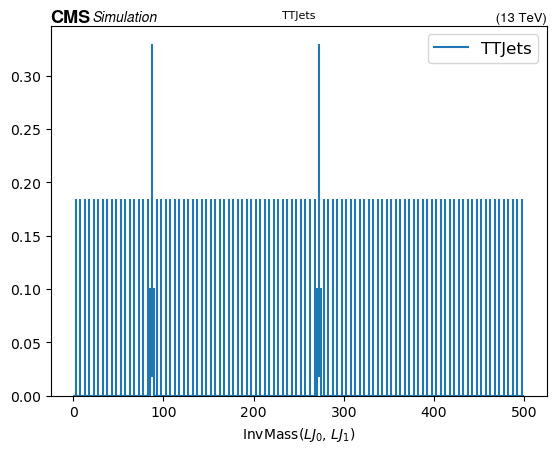

In [18]:
hist = "lj_lj_invmass_lowRange"

utilities.plot(out[samples[0]]["hists"][hist]["4mu", :], density=True)
plt.title(samples[0], size=8)
plt.legend([samples[0]], prop={"size": 12})

In [19]:
cutflow.print_multi_table([out[sample]["cutflow"]["4mu_matchedLj"] for sample in samples], [sample for sample in samples], fraction=False)
# the matched As are gen-level particles, so none are present in TTJets


cut name          Total cuts:                  Total cuts:                  Total cuts:                Total cuts:                   Total cuts:                  Total cuts:                 Total cuts:                  Total cuts:                  Total cuts:                Total cuts:                   Total cuts:                  Total cuts:                 Total cuts:                    Total cuts:                  Total cuts:                 Total cuts:                    Total cuts:                  Total cuts:
                        TTJets    4mu_100GeV_0p25GeV_0p02mm    4mu_100GeV_1p2GeV_0p096mm    4mu_100GeV_5p0GeV_0p4mm    4mu_150GeV_0p25GeV_0p013mm    4mu_150GeV_1p2GeV_0p064mm    4mu_150GeV_5p0GeV_0p27mm    4mu_200GeV_0p25GeV_0p01mm    4mu_200GeV_1p2GeV_0p048mm    4mu_200GeV_5p0GeV_0p2mm    4mu_500GeV_0p25GeV_0p004mm    4mu_500GeV_1p2GeV_0p019mm    4mu_500GeV_5p0GeV_0p08mm    4mu_800GeV_0p25GeV_0p0025mm    4mu_800GeV_1p2GeV_0p012mm    4mu_800GeV_5p0GeV_0p05mm    4mu_1000GeV

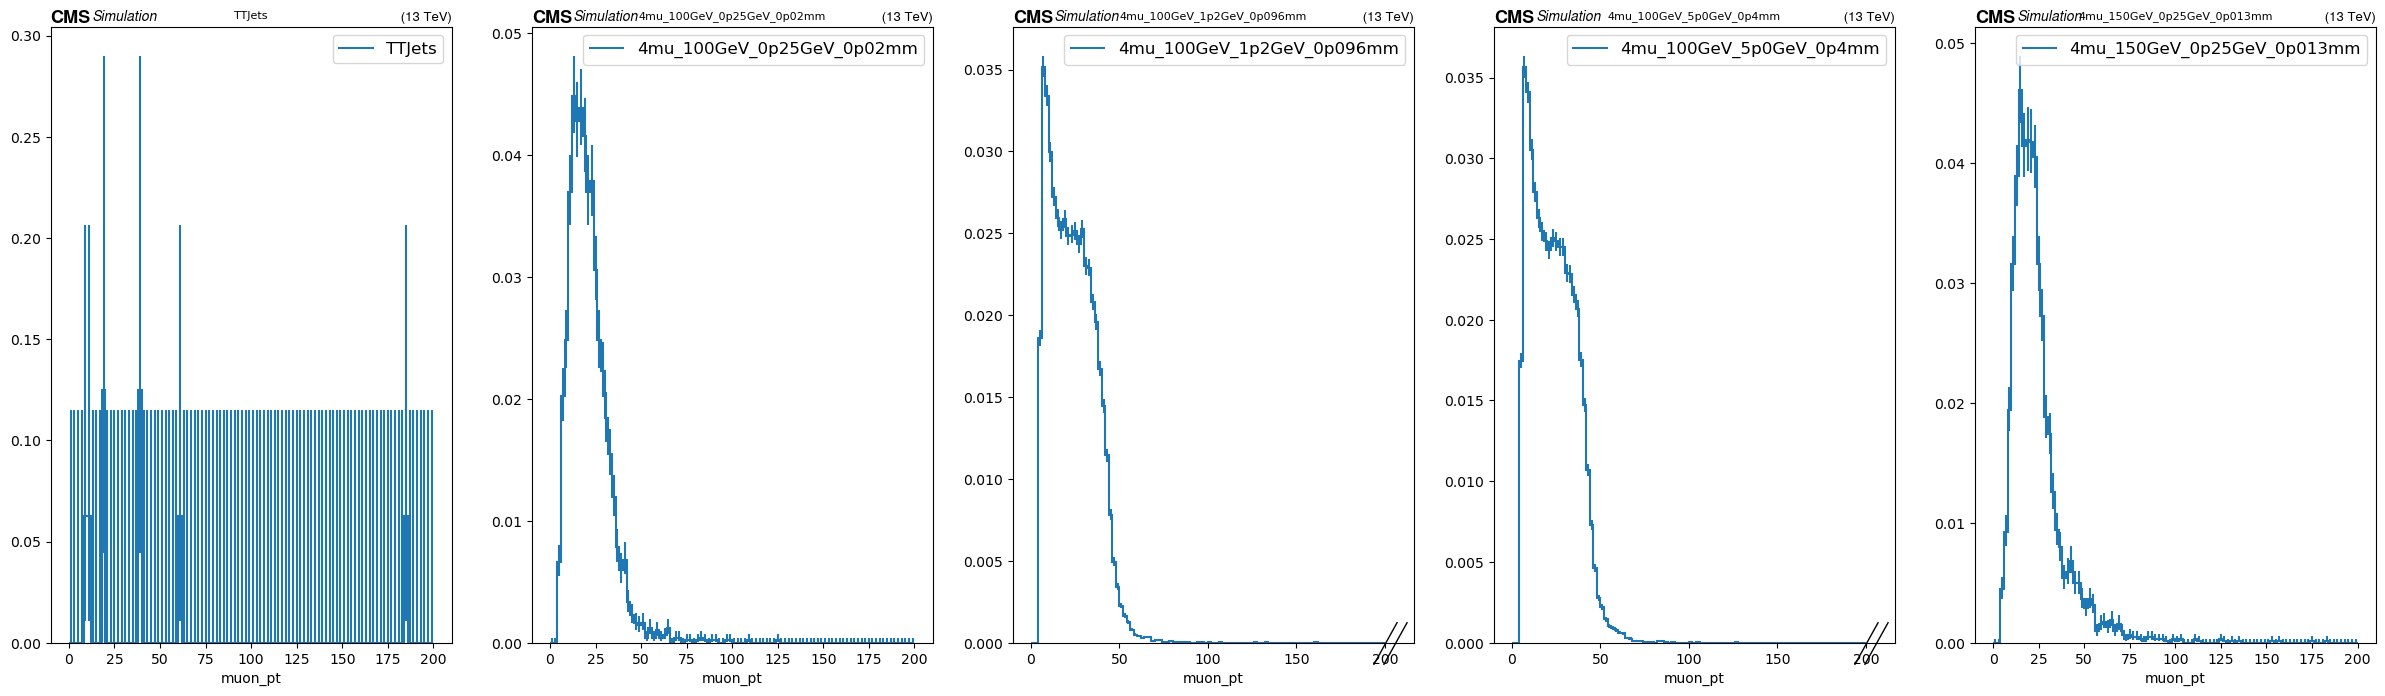

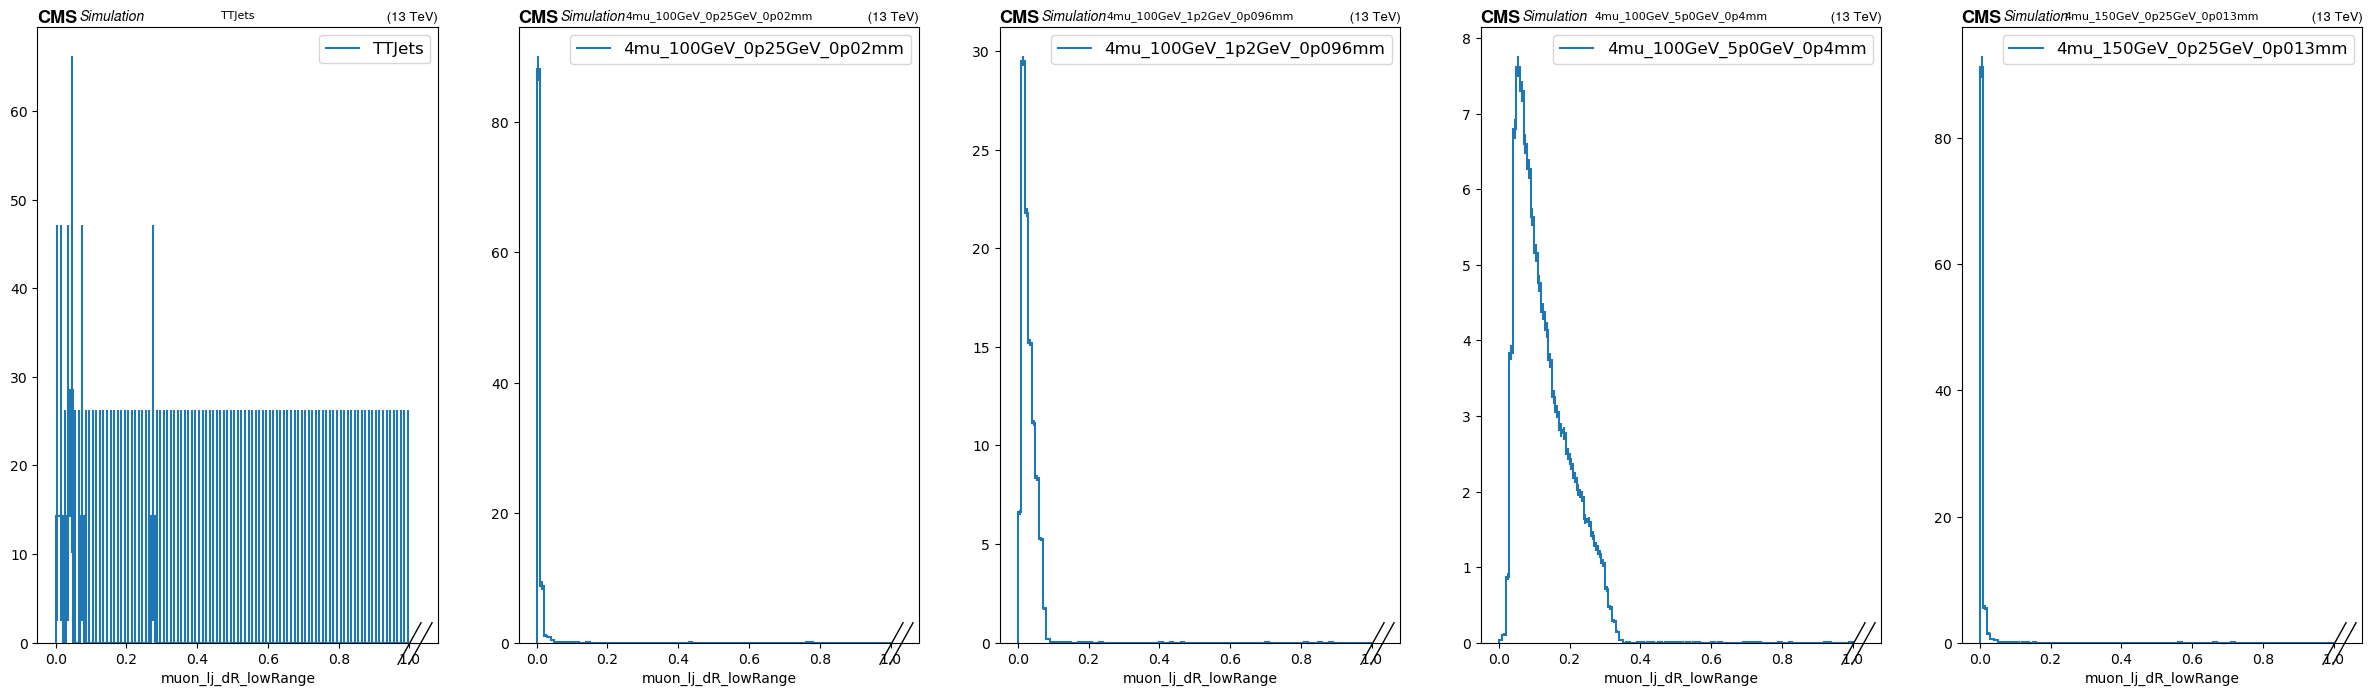

In [20]:
histlist = ["muon_pt", "muon_lj_dR_lowRange"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["4mu", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

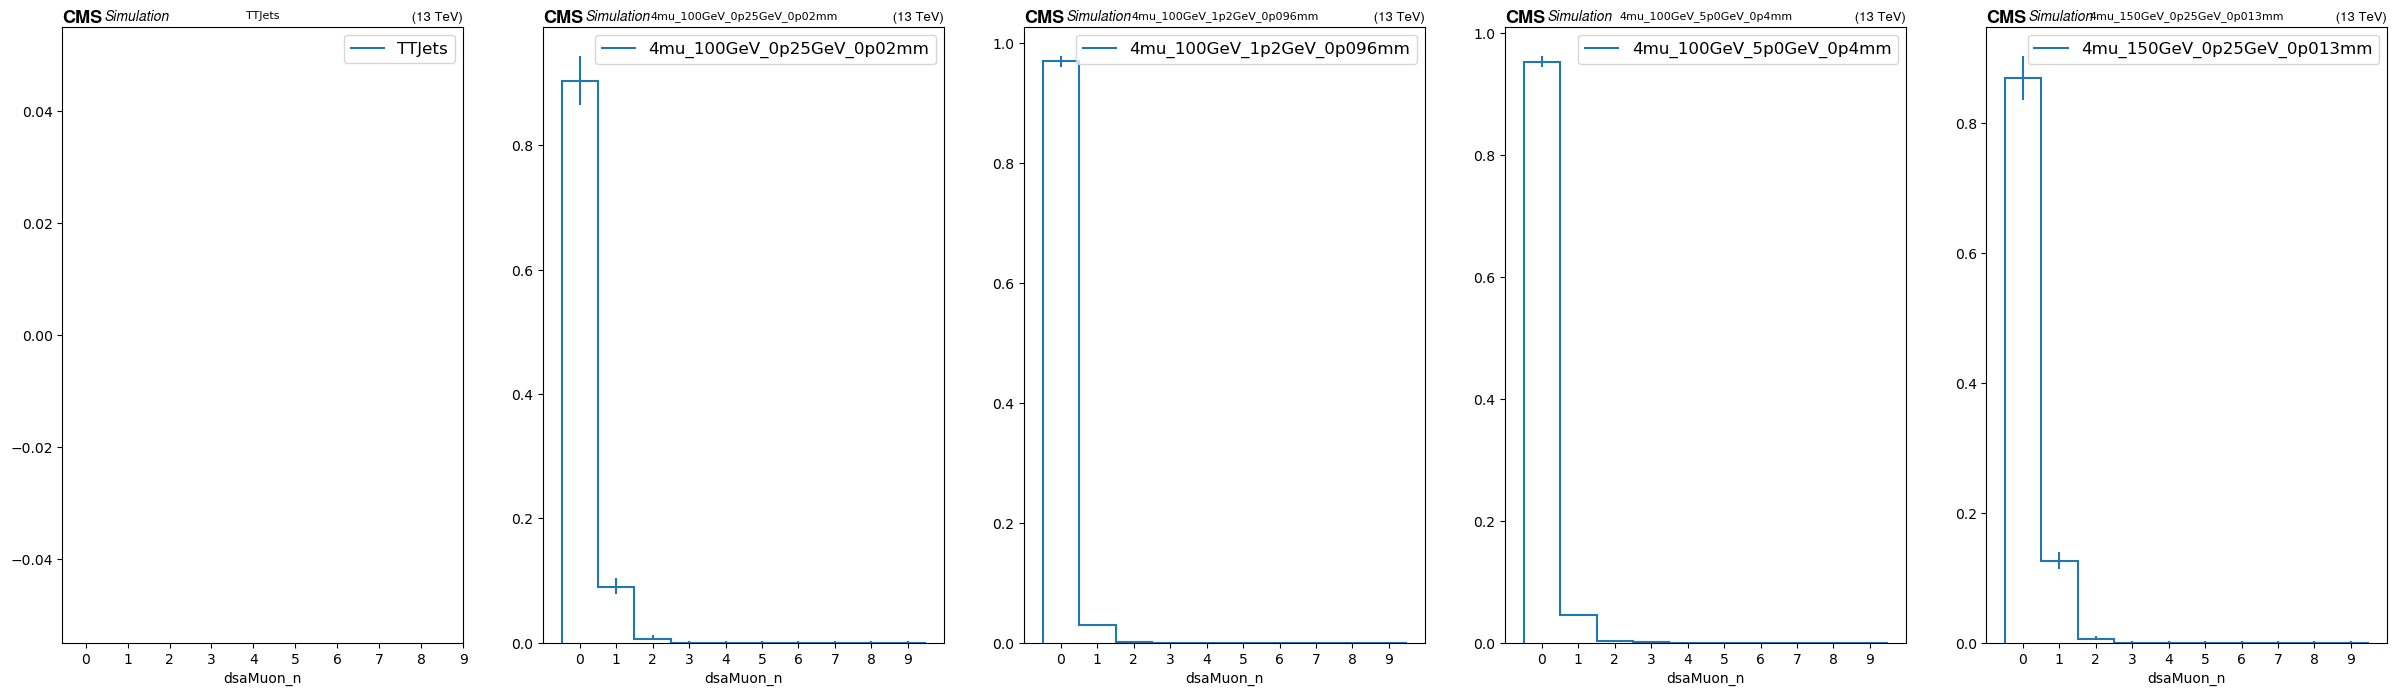

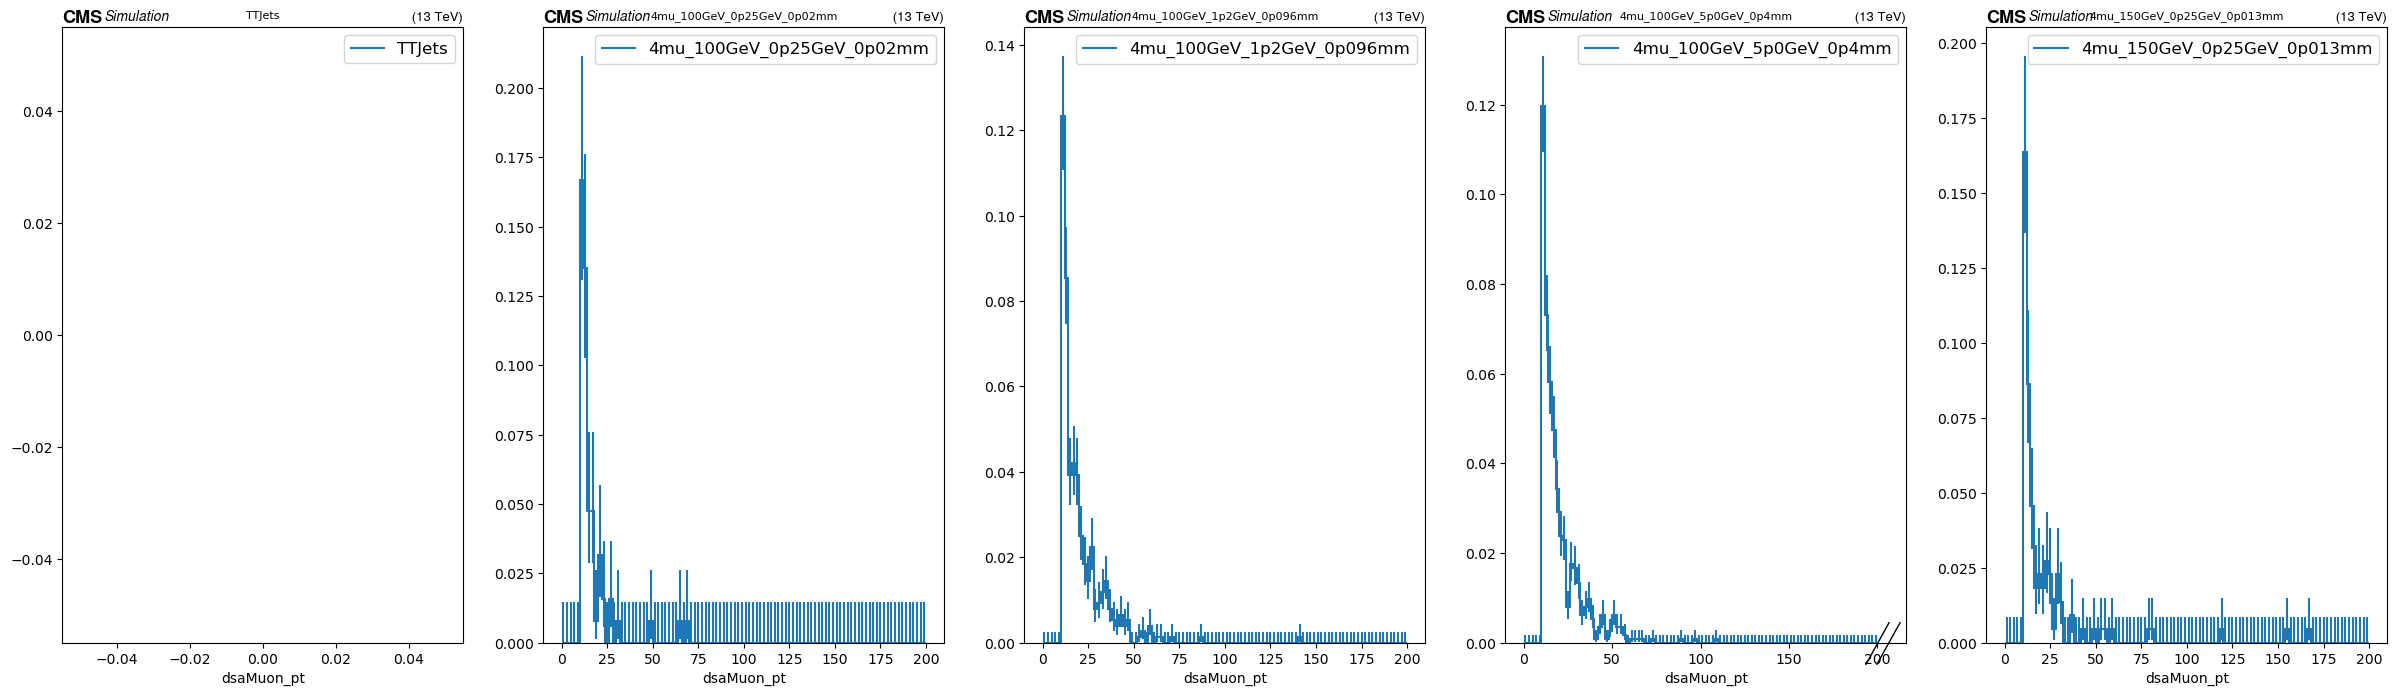

In [21]:
histlist = ["dsaMuon_n", "dsaMuon_pt"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

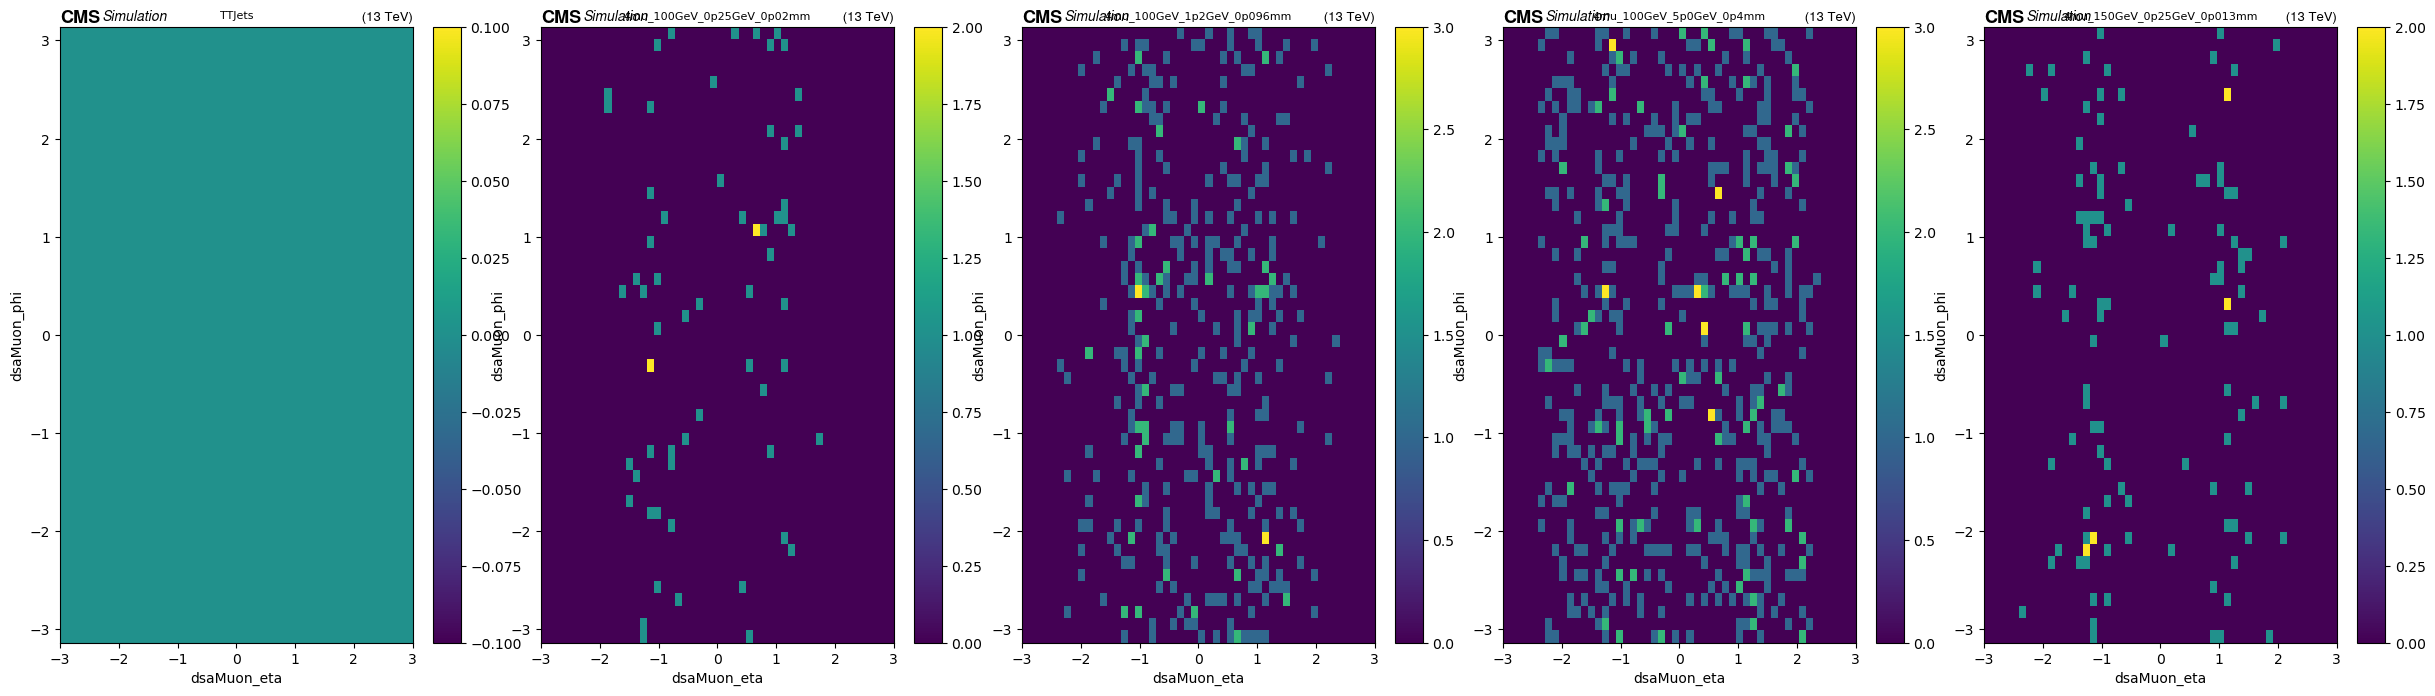

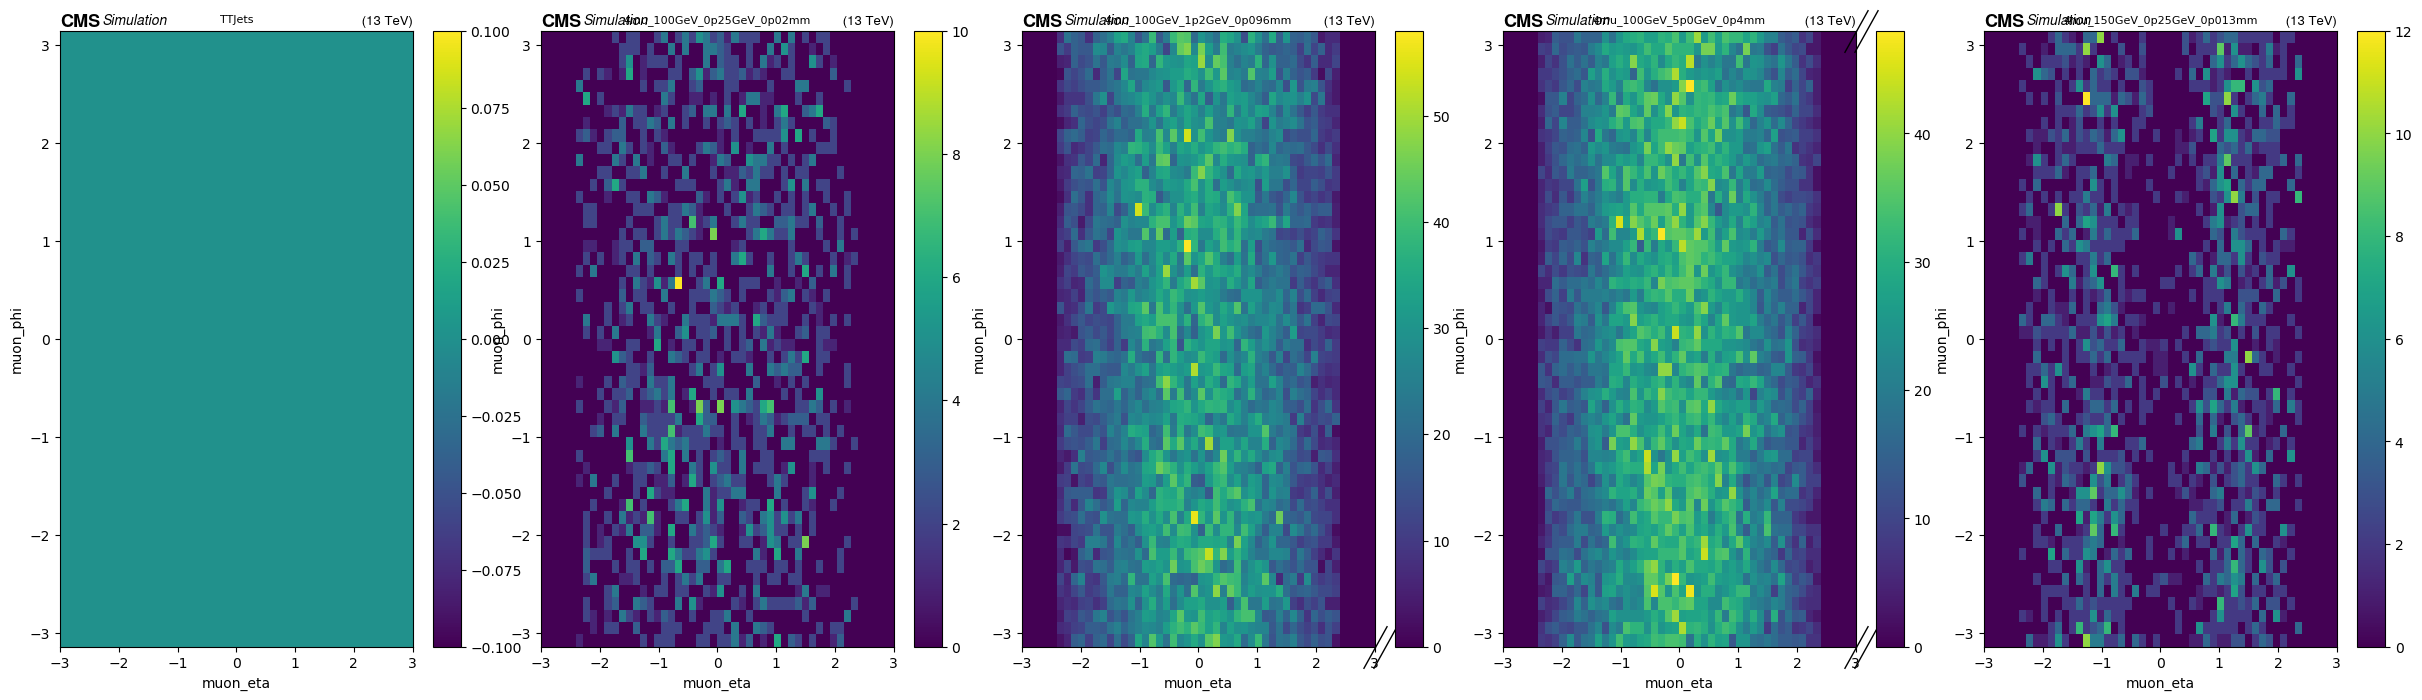

In [22]:
histlist = ["dsaMuon_eta_phi", "muon_eta_phi"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :, :])
        plt.title(samples[i], size=8)

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:242: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:262: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/p

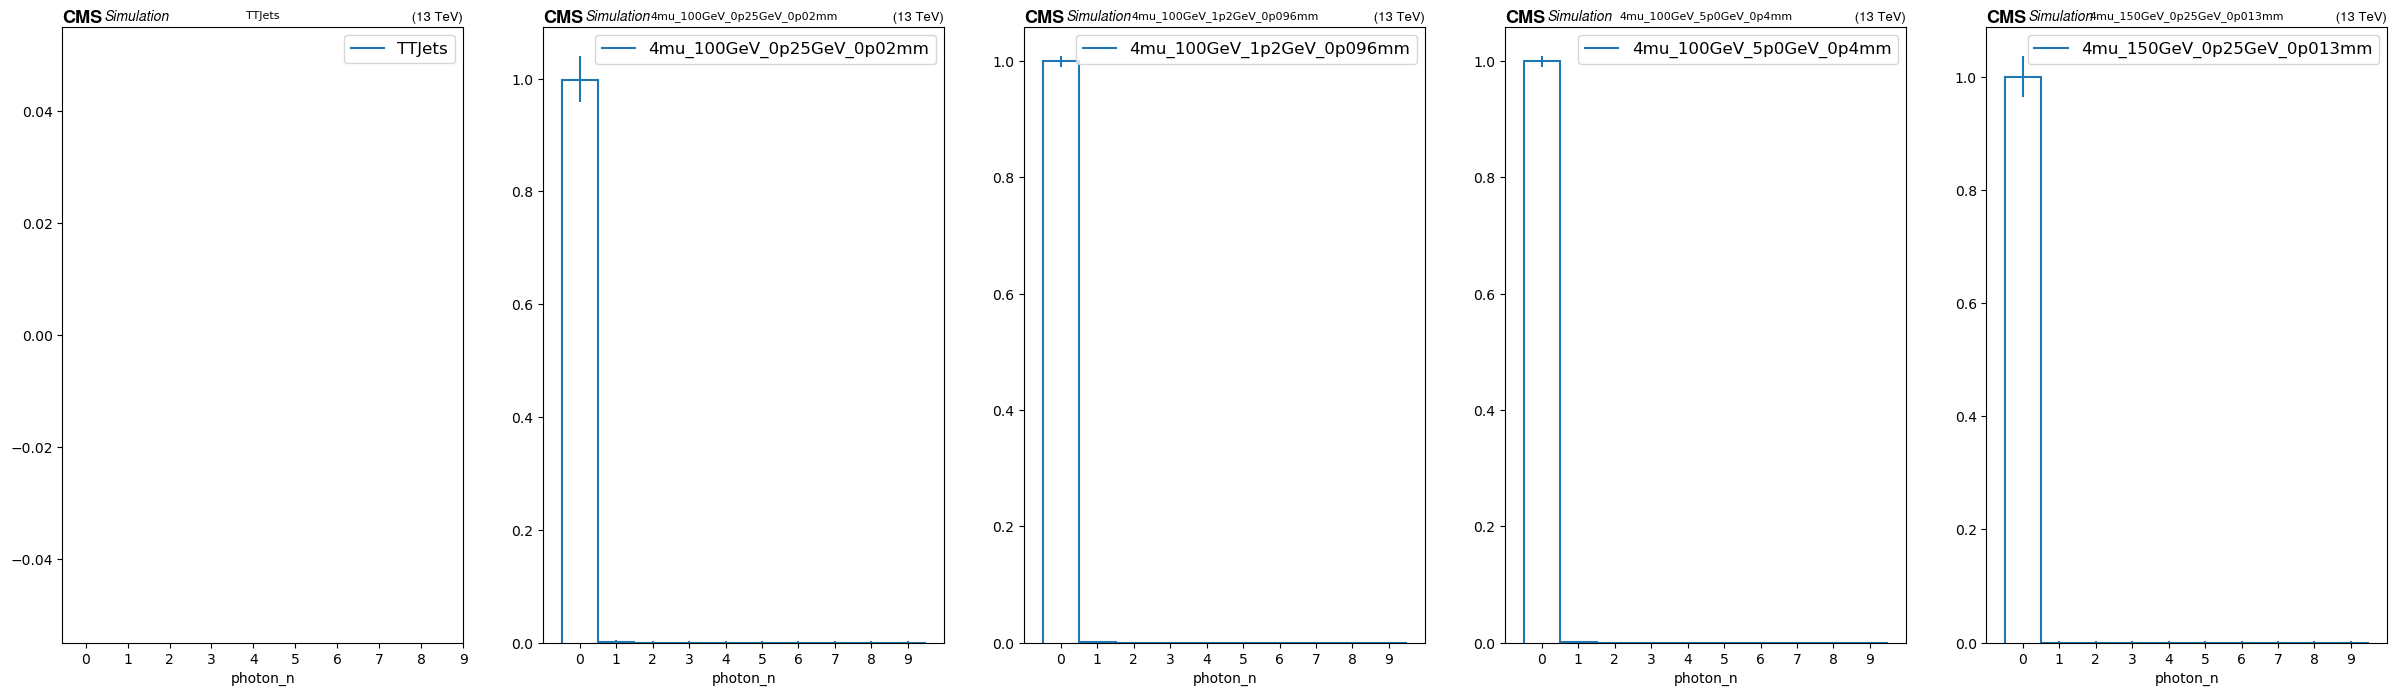

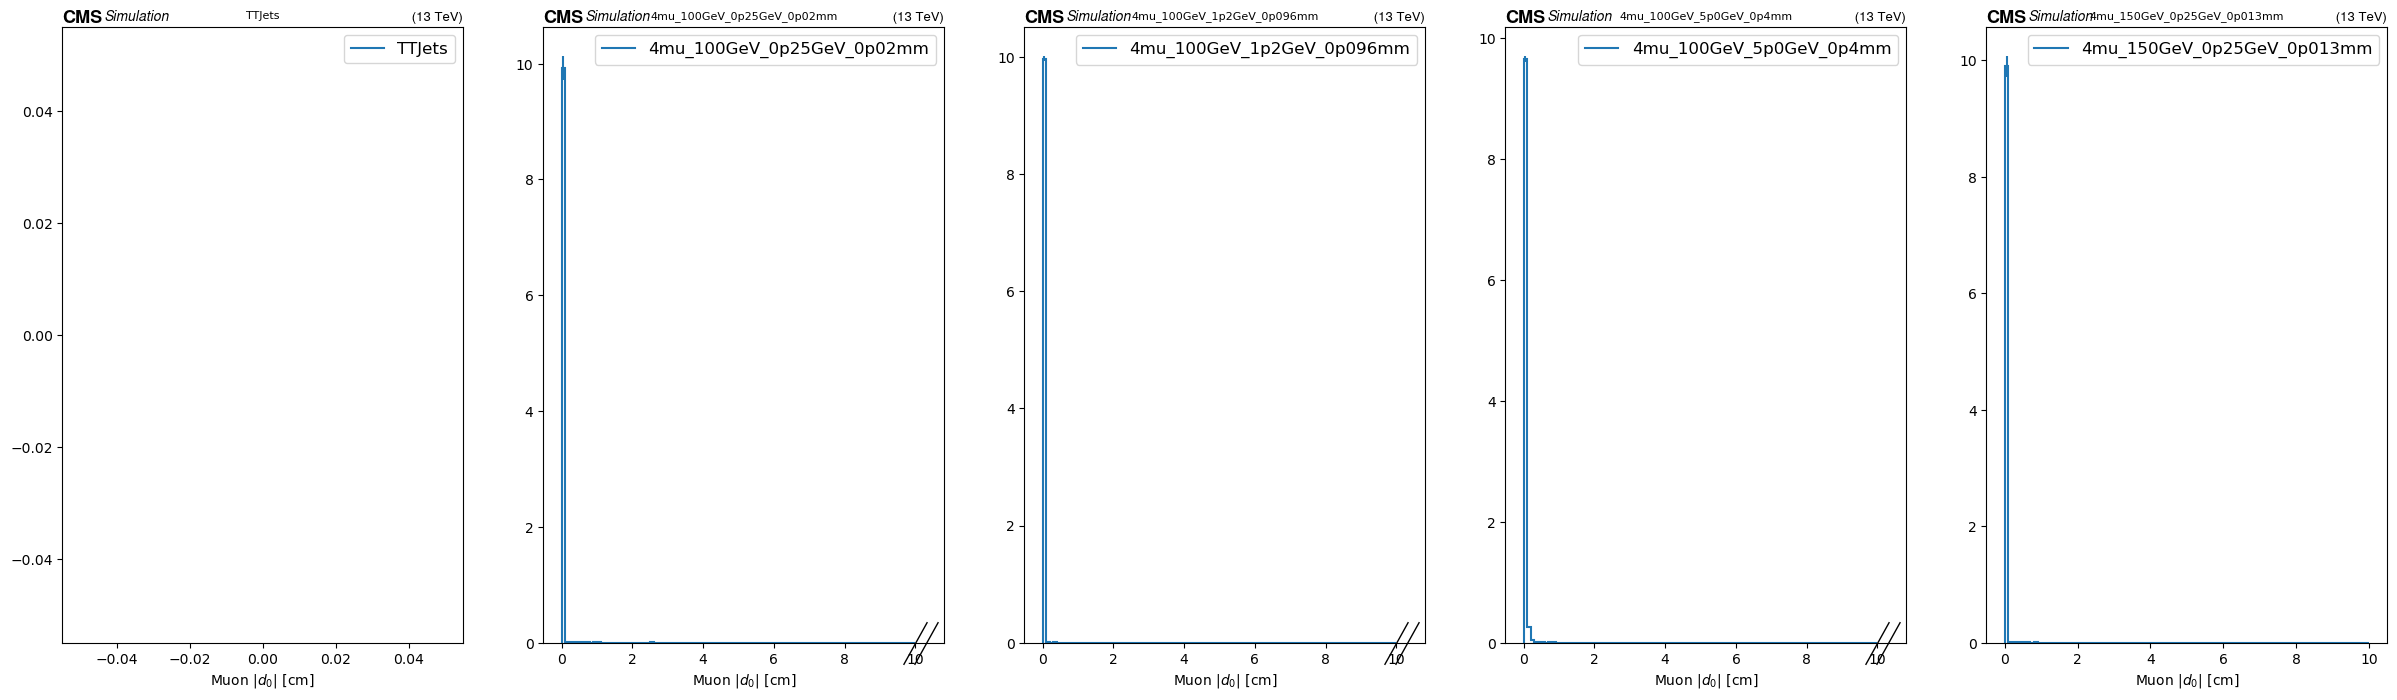

In [23]:
histlist = ["photon_n", "muon_absD0_lowRange"]

for hist in histlist:
    plt.subplots(1, 5, figsize=(30, 8))
    for i in range(5):
        plt.subplot(1,5,i+1)
        utilities.plot(out[samples[i]]["hists"][hist]["matchedLj", :], density=True)
        plt.title(samples[i], size=8)
        plt.legend([samples[i]], prop={"size": 12})

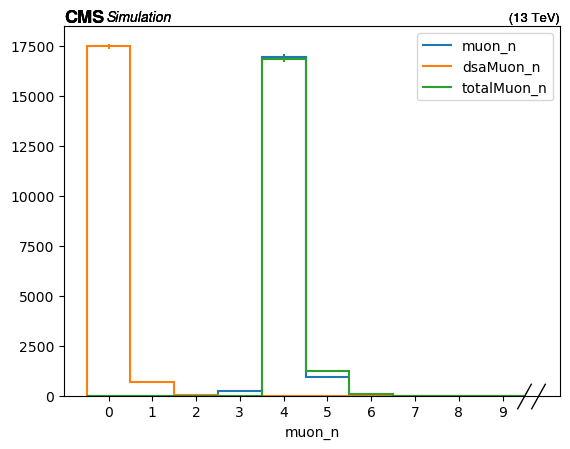

In [24]:
histlist = ["muon_n","dsaMuon_n","totalMuon_n"]
for hist in histlist:
    utilities.plot(out[samples[-1]]["hists"][hist]["4mu_matchedLj", :], density=False)
plt.legend(histlist)